# Fourier Usage Examples

This notebook shows off some of what the `fourier_deriv` function can do. Note the set of mathematical functions that can work with this method is much more constrained than that `cheb_deriv` can handle. Much of this notebook is dedicated to showing how `fourier_deriv` can fail. But if you have periodic boundary conditions, you may prefer this.

## Setup

Imports and set up domain that will be used throughout.

In [1]:
import sys; sys.path.append('../specderiv') # so I can import specderiv code from a neighboring working directory
from specderiv import fourier_deriv
import numpy as np
from matplotlib import pyplot

In [2]:
M = 20 # length M, in keeping with the usage of M in my math.pdf notes.
th_n = np.arange(0, M) * 2*np.pi / M # It's important this be an *open* periodic domain, or we get artefacting, e.g. th_n = np.linspace(0, M, M)*2*np.pi/M
th = np.linspace(0, 2 * np.pi, 100) # A denser set of points over the domain, for plotting

## Derivatives in 1D

The most basic thing this package accomplishes is taking derivatives. It's useful to look at what it calculates in 1D against a known answer.

Here I'm testing against three functions:

- $\cos(\theta) + 2\sin(3\theta)$, which *is* periodic on $[0, 2\pi)$,
- $e^{\frac{\theta}{\pi} - 1} \sin(5(\frac{\theta}{\pi} - 1))$, which *is not* periodic on $[0, 2\pi)$ and is meant to mirror $e^x \sin(5x)$ used in the [Chebyshev notebook](https://github.com/pavelkomarov/spectral-derivatives/blob/main/examples/chebyshev.ipynb), and
- $\sin(\frac{3\theta}{2})$, which lines up at the endpoints but *is not* actually periodic, because the endpoints don't join smoothly.

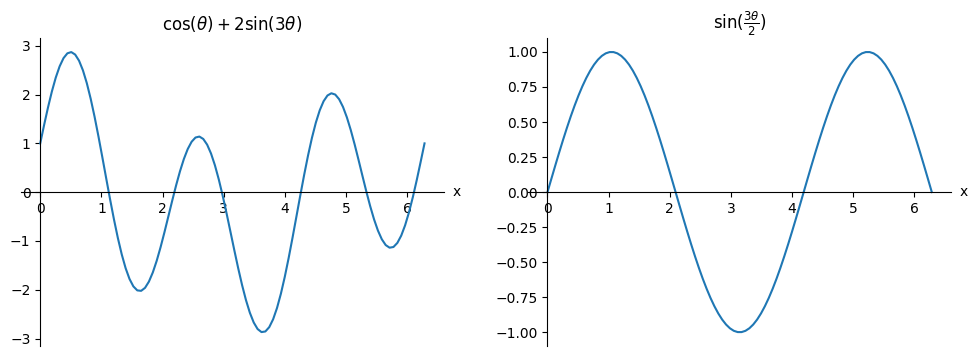

In [3]:
fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(th, np.cos(th) + 2*np.sin(3*th))
axes[0].set_title(r'$\cos(\theta) + 2\sin(3\theta)$')
axes[0].spines['bottom'].set_position('zero')
axes[0].spines['left'].set_position('zero')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlabel('x', labelpad=-22, x=1.03)
axes[1].plot(th, np.sin(3*th/2))
axes[1].set_title(r'$\sin(\frac{3\theta}{2})$')
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['left'].set_position('zero')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_xlabel('x', labelpad=-22, x=1.03);

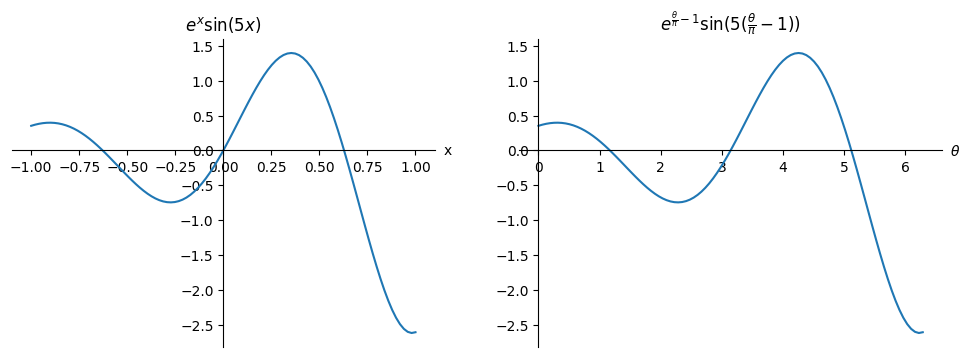

In [4]:
x = np.linspace(-1, 1, 100)

fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(x, np.exp(x)*np.sin(5*x))
axes[0].set_title(r'$e^x \sin(5x)$')
axes[0].spines['bottom'].set_position('zero')
axes[0].spines['left'].set_position('zero')
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlabel('x', labelpad=-22, x=1.03)
axes[1].plot(th, np.exp(th/np.pi - 1)*np.sin(5*(th/np.pi - 1)))
axes[1].set_title(r'$e^{\frac{\theta}{\pi} - 1} \sin(5(\frac{\theta}{\pi} - 1))$')
axes[1].spines['bottom'].set_position('zero')
axes[1].spines['left'].set_position('zero')
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_xlabel(r'$\theta$', labelpad=-22, x=1.03);

The reason to do this is we expect Fourier-based differentiation to work in the periodic case and not in the aperiodic case.

### The Periodic Case

We can find the function's derivatives analytically and compare to the `fourier_deriv` function's answers at $\theta_n$:

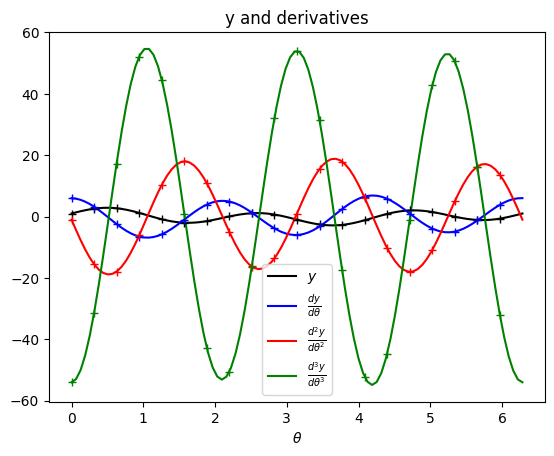

In [5]:
# true function and analytic derivatives. You can evaluate these with WolframAlpha or by hand.
y = np.cos(th) + 2*np.sin(3*th)
dy = -np.sin(th) + 6*np.cos(3*th)
d2y = -np.cos(th) - 18*np.sin(3*th)
d3y = np.sin(th) - 54*np.cos(3*th)

pyplot.plot(th, y, 'k', label="$y$")
pyplot.plot(th, dy, 'b', label=r"$\frac{dy}{d\theta}$")
pyplot.plot(th, d2y, 'r', label=r"$\frac{d^2y}{d\theta^2}$")
pyplot.plot(th, d3y, 'g', label=r"$\frac{d^3y}{d\theta^3}$")
pyplot.title("y and derivatives")
pyplot.xlabel(r'$\theta$')
pyplot.legend()

# sampled function and computed derivatives
y_n = np.cos(th_n) + 2*np.sin(3*th_n)
dy_n = fourier_deriv(y_n, th_n, 1)
d2y_n = fourier_deriv(y_n, th_n, 2)
d3y_n = fourier_deriv(y_n, th_n, 3)

pyplot.plot(th_n, y_n, 'k+')
pyplot.plot(th_n, dy_n, 'b+')
pyplot.plot(th_n, d2y_n, 'r+')
pyplot.plot(th_n, d3y_n, 'g+');

Very cool. And the sample points are evenly-spaced, which we may or may not prefer, contrary to the Chebyshev case.

### The Aperiodic Case

Now let's try it on our function that doesn't match up to itself at the edges of the domain:

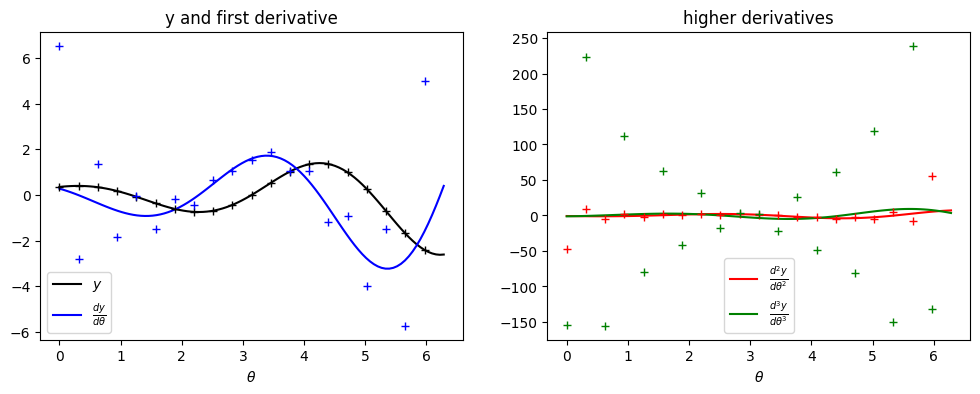

In [6]:
# true function and analytic derivatives. You can evaluate these with WolframAlpha or by hand.
y = np.exp(th/np.pi - 1) * np.sin(5*(th/np.pi - 1))
dy = np.exp(th/np.pi - 1) * (np.sin(5*(th/np.pi - 1)) + 5*np.cos(5 - 5*th/np.pi)) / np.pi
d2y = 2*np.exp(th/np.pi - 1) * (5*np.cos(5 - 5*th/np.pi) - 12*np.sin(5*(th/np.pi - 1))) / np.pi**2
d3y = -2*np.exp(th/np.pi - 1) * (37*np.sin(5*(th/np.pi - 1)) + 55*np.cos(5 - 5*th/np.pi)) / np.pi**3

# I'm breaking these apart across two subplots, because the scale gets enormous
# for higher derivatives and obscures what's happening for the lower ones.
fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(th, y, 'k', label="$y$")
axes[0].plot(th, dy, 'b', label=r"$\frac{dy}{d\theta}$")
axes[0].set_title("y and first derivative")
axes[0].set_xlabel(r'$\theta$')
axes[0].legend()
axes[1].plot(th, d2y, 'r', label=r"$\frac{d^2y}{d\theta^2}$")
axes[1].plot(th, d3y, 'g', label=r"$\frac{d^3y}{d\theta^3}$")
axes[1].set_title("higher derivatives")
axes[1].set_xlabel(r'$\theta$')
axes[1].legend()

# sampled function and computed derivatives
y_n =  np.exp(th_n/np.pi - 1) * np.sin(5*(th_n/np.pi - 1))
dy_n = fourier_deriv(y_n, th_n, 1)
d2y_n = fourier_deriv(y_n, th_n, 2)
d3y_n = fourier_deriv(y_n, th_n, 3)

axes[0].plot(th_n, y_n, 'k+')
axes[0].plot(th_n, dy_n, 'b+')
axes[1].plot(th_n, d2y_n, 'r+')
axes[1].plot(th_n, d3y_n, 'g+');

As you can see, it *kind of* traces the function for the 1st derivative around the middle of the domain, but it's really wild around the edges. It's trying but failing even worse at the edges for the 2nd derivative. And for higher derivatives the situation is pretty hopeless. This is why we use Chebyshev instead for these kinds of functions.

### The Subtle Aperiodic Case

Note that for a case to be truly periodic, the endpoints need to line up smoothly, not just have the same value at the endpoints. Let's see this in action:

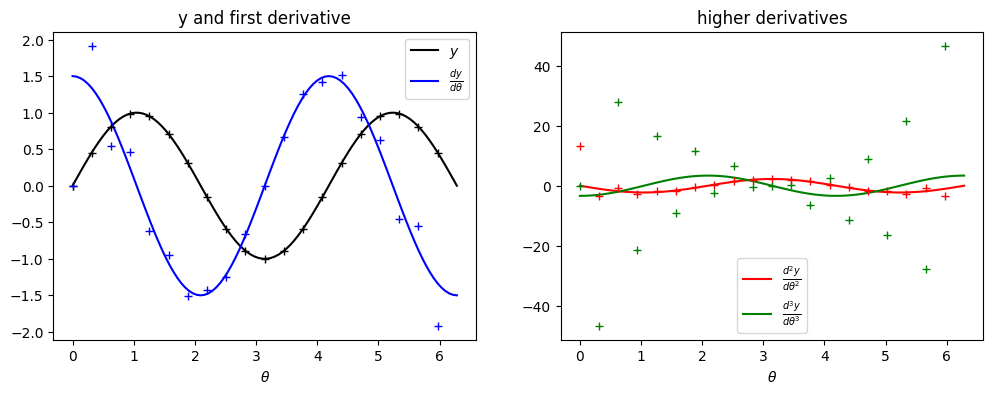

In [7]:
# true function and analytic derivatives. You can evaluate these with WolframAlpha or by hand.
y = np.sin(3*th/2)
dy = 3/2 * np.cos(3*th/2)
d2y = -9/4 * np.sin(3*th/2)
d3y = -27/8 * np.cos(3*th/2)

# I'm breaking these apart across two subplots, because the scale gets enormous
# for higher derivatives and obscures what's happening for the lower ones.
fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(th, y, 'k', label="$y$")
axes[0].plot(th, dy, 'b', label=r"$\frac{dy}{d\theta}$")
axes[0].set_title("y and first derivative")
axes[0].set_xlabel(r'$\theta$')
axes[0].legend()
axes[1].plot(th, d2y, 'r', label=r"$\frac{d^2y}{d\theta^2}$")
axes[1].plot(th, d3y, 'g', label=r"$\frac{d^3y}{d\theta^3}$")
axes[1].set_title("higher derivatives")
axes[1].set_xlabel(r'$\theta$')
axes[1].legend()

# sampled function and computed derivatives
y_n =  np.sin(3*th_n/ 2)
dy_n = fourier_deriv(y_n, th_n, 1)
d2y_n = fourier_deriv(y_n, th_n, 2)
d3y_n = fourier_deriv(y_n, th_n, 3)

axes[0].plot(th_n, y_n, 'k+')
axes[0].plot(th_n, dy_n, 'b+')
axes[1].plot(th_n, d2y_n, 'r+')
axes[1].plot(th_n, d3y_n, 'g+');

Once again the edges are no good, and by the third derivative we're seriously blowing up.

## Derivatives in 2D

Let's now work with some higher-dimensional data.

$y(\theta_1, \theta_2) = \sin(2\theta_1)\cos(\theta_2)$ is a fun-looking, easy-to-analytically-differentiate thing that's $2\pi$ periodic in both $\theta_1$ and $\theta_2$.

In [8]:
T1, T2 = np.meshgrid(th, th) # a 100 x 100 grid

y = np.sin(2*T1) * np.cos(T2)

Now let's take some multidimensional derivatives, $\frac{d^2}{d\theta_1 d\theta_2}$ and the Laplacian, $\nabla^2 = \frac{d^2}{d\theta_1^2} + \frac{d^2}{d\theta_2^2}$.

In [9]:
d1d2y = -2*np.cos(2*T1)*np.sin(T2)
Laplacian = -5*np.sin(2*T1)*np.cos(T2)

Now let's use `fourier_deriv` to find these same objects. Remember we need to sample the function at our equispaced points, $\theta_n$ first.

In [10]:
T1_n, T2_n = np.meshgrid(th_n, th_n) # same shapes as T1 and T2, but sample M in each dimension
y_n = np.sin(2*T1_n) * np.cos(T2_n) # y sampled

d2y_n = fourier_deriv(fourier_deriv(y_n, th_n, 1, axis=0), th_n, 1, axis=1) # One-lineable!
Laplacian_n = fourier_deriv(y_n, th_n, 2, axis=0) + fourier_deriv(y_n, th_n, 2, axis=1) # One-lineable!

And now plot:

In [ ]:
fig = pyplot.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(T1, T2, y, cmap='viridis', alpha=0.5)
ax1.set_title('original function')
ax1.set_xlabel(r'$\theta_1$')
ax1.set_ylabel(r'$\theta_2$')
ax1.view_init(elev=45, azim=-125)
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(T1, T2, d1d2y, cmap='viridis', alpha=0.5)
ax2.set_title(r'$\frac{\partial^2}{\partial \theta_1 \partial \theta_2}$')
ax2.set_xlabel(r'$\theta_1$')
ax2.set_ylabel(r'$x\theta_2$')
ax2.view_init(elev=45, azim=-125)
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(T1, T2, Laplacian, cmap='viridis', alpha=0.5)
ax3.set_title(r'$\frac{\partial^2}{\partial \theta_1^2} + \frac{\partial^2}{\partial \theta_2^2}$')
ax3.set_xlabel(r'$\theta_1$')
ax3.set_ylabel(r'$\theta_2$')
ax3.view_init(elev=45, azim=-125)

ax1.plot_wireframe(T1_n, T2_n, y_n)
ax2.plot_wireframe(T1_n, T2_n, d2y_n)
ax3.plot_wireframe(T1_n, T2_n, Laplacian_n)

pyplot.tight_layout()

Note the wireframe doesn't make it all the way to the second edge of the function because the domain is open!